In [21]:
import pandas as pd
import numpy as np
import datetime as dt
import glob
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option("display.max_rows", 20)
mpl.rcParams['pdf.fonttype'] = 42

cfs_2_cms = 0.0283168466
pd.options.mode.chained_assignment = None  # default='warn'

### Load drying regimes data and non-perennial gages from PNW

In [22]:
dryReg = pd.read_csv("../data/dryingRegimes_data_RF.csv")
pnwNP = pd.read_csv("../data/pnwNP_Info.csv")

### Make columns in "YYYY-MM-DD" format for each drying event

In [23]:
dryReg["dryStart"] = pd.to_datetime(dryReg["calendar_year"], format='%Y')+ pd.to_timedelta(dryReg["dry_date_start"], unit='days')
dryReg["dryEnd"] = dryReg["dryStart"]+ pd.to_timedelta(dryReg["dry_dur"], unit='days')
dryReg["dryPeakDate"] = pd.to_datetime(dryReg["calendar_year"], format='%Y')+ pd.to_timedelta(dryReg["peak_date"], unit='days')

### Subset drying regimes data to PNW gages

In [24]:
pnwNPdry = dryReg[dryReg["gage"].isin(pnwNP['gage'])].reset_index()

In [25]:
# gages = [14362250,12115700,14034470]
# df = pd.read_csv('../data/pnwNP_modeledData/'+str(pnwNP['gage'][i])+".csv")

df = pd.read_csv('../data/pnwNP_modeledData/'+"14362250"+".csv")


df["time"] = pd.to_datetime(df["time"])
tmp = pnwNPdry[pnwNPdry["gage"] == 14362250].reset_index(drop=True)
tmp[(tmp['dryEnd'] <= "2004-03-01")]

,index,gage,event_id,dec_lat_va,dec_long_va,peak_date,peak_value,peak_quantile,peak2zero,drying_rate,...,P_90,PET_90,Tmax_90,melt_90,P.PET,P.PET90,pred_class,dryStart,dryEnd,dryPeakDate
0,25186,14362250,30360,42.15401,-123.0753,168,0.9,0.366651,60,0.052975,...,33,538,26.26000,0.0,0.0,0.061338,3.0,1986-08-16,1986-08-30,1986-06-18
1,25187,14362250,30361,42.15401,-123.0753,145,0.8,0.336129,49,0.146523,...,45,489,23.39778,0.0,0.0,0.092025,3.0,1987-07-13,1987-07-17,1987-05-26
2,25188,14362250,30362,42.15401,-123.0753,202,1.1,0.424588,15,0.415029,...,93,517,24.33111,0.0,0.0,0.179884,3.0,1987-08-05,1987-09-08,1987-07-22
3,25189,14362250,30363,42.15401,-123.0753,159,2.8,0.662628,43,0.416197,...,144,430,20.70556,1.0,0.0,0.334884,3.0,1988-07-20,1988-09-23,1988-06-08
4,25190,14362250,30364,42.15401,-123.0753,150,3.7,0.721187,54,0.471248,...,117,434,21.47778,0.0,0.0,0.269585,3.0,1990-07-23,1990-08-19,1990-05-31
5,25191,14362250,30365,42.15401,-123.0753,197,1.5,0.508854,16,0.946260,...,136,454,21.70222,0.0,0.0,0.299559,3.0,1991-08-01,1991-10-24,1991-07-17
6,25192,14362250,30366,42.15401,-123.0753,120,1.0,0.397950,70,0.323703,...,167,459,22.08222,0.0,0.0,0.363834,3.0,1992-07-08,1992-10-29,1992-04-30
7,25193,14362250,30368,42.15401,-123.0753,109,1.8,0.557471,62,0.030145,...,90,389,18.57000,1.0,0.0,0.231362,3.0,2001-06-20,2001-06-26,2001-04-20
8,25194,14362250,30369,42.15401,-123.0753,177,0.7,0.302811,19,0.337220,...,83,476,22.85778,0.0,0.0,0.174370,3.0,2001-07-15,2001-09-28,2001-06-27
9,25195,14362250,30370,42.15401,-123.0753,159,0.9,0.366651,26,0.047852,...,80,413,19.71444,0.0,0.0,0.193705,3.0,2002-07-04,2002-10-04,2002-06-09


In [26]:
tmp[tmp["event_id"]==30370]

,index,gage,event_id,dec_lat_va,dec_long_va,peak_date,peak_value,peak_quantile,peak2zero,drying_rate,...,P_90,PET_90,Tmax_90,melt_90,P.PET,P.PET90,pred_class,dryStart,dryEnd,dryPeakDate
9,25195,14362250,30370,42.15401,-123.0753,159,0.9,0.366651,26,0.047852,...,80,413,19.71444,0.0,0.0,0.193705,3.0,2002-07-04,2002-10-04,2002-06-09


In [27]:
out = df[(df['time'] >= '2002-01-01')&(df['time'] <= "2003-04-01")]
out['state'] = 1
# out.loc[(df['time'] >= "2002-06-09")&(df['time'] < "2002-10-4"),'state'] = 1 ## drying
out.loc[(df['time'] >= "2002-07-04")&(df['time'] <= "2002-10-04"),'state'] = -999 ## dry

In [28]:
out

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,state
18993,18993,1.485918,2002-01-01,3.095360,0.161667,0.040000,0.221155,14362250,1
18994,18994,1.528273,2002-01-02,3.058435,0.177917,0.040000,0.233048,14362250,1
18995,18995,1.075663,2002-01-03,2.493174,0.178750,0.040000,0.233897,14362250,1
18996,18996,0.801983,2002-01-04,1.886100,0.188750,0.040000,0.204164,14362250,1
18997,18997,1.671595,2002-01-05,3.432419,0.197500,0.040000,0.181794,14362250,1
...,...,...,...,...,...,...,...,...,...
19444,19444,1.852558,2003-03-28,2.310497,0.951250,0.757500,0.560674,14362250,1
19445,19445,1.592540,2003-03-29,1.582377,0.975417,0.697083,0.492713,14362250,1
19446,19446,1.469500,2003-03-30,1.215179,0.962083,0.653750,0.436079,14362250,1
19447,19447,1.870299,2003-03-31,1.382424,0.926250,0.602083,0.407763,14362250,1


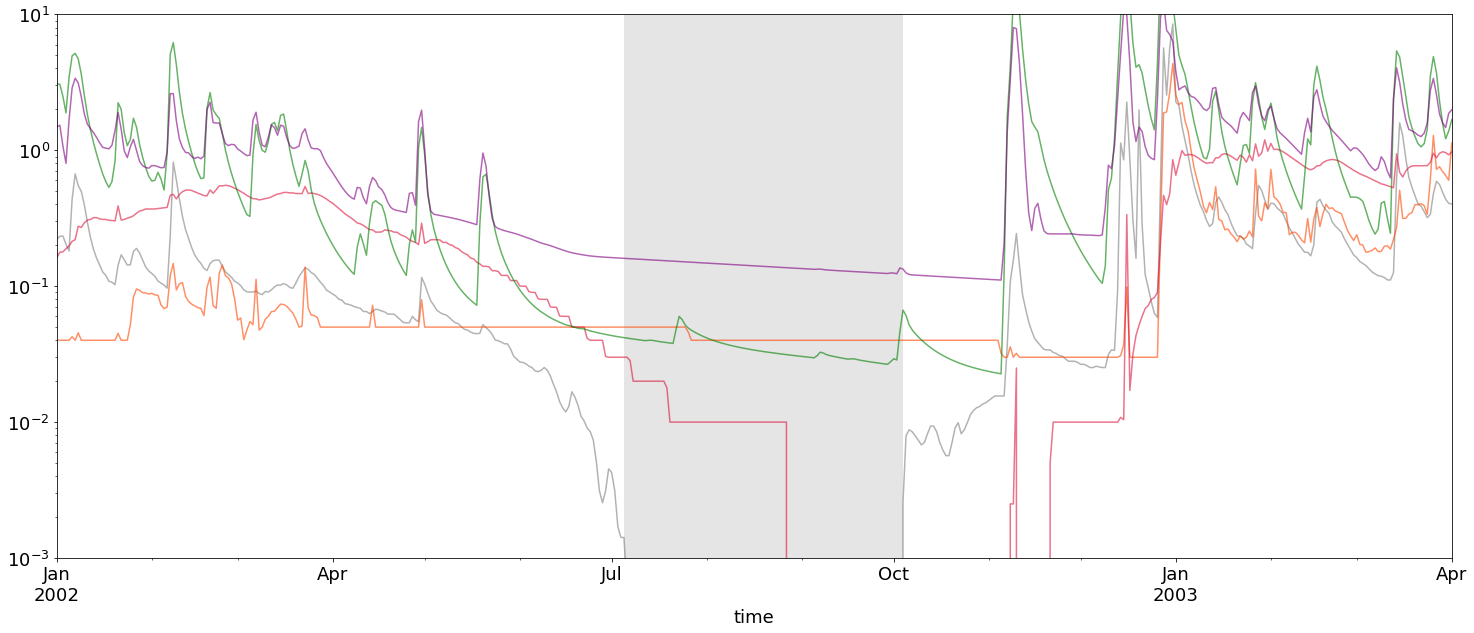

In [29]:

plt.rcParams.update({'font.size': 18})
ax = out.plot(x = "time", 
        y = ["streamflow_NWIS","streamflow_NWM2d1","streamflow_NWM2d0","streamflow_PRMS","streamflow_VIC"],
        alpha=0.6,
        linewidth = 1.5,
        legend = False,
        color = ['grey','orangered','crimson','green','purple'],
        figsize = (25,10),
        logy=True)
ax.set(ylim = (0.001,10))
# ax.axvspan(xmin="2002-06-09", xmax='2002-07-05', facecolor="grey", alpha=0.2)
ax.axvspan(xmin="2002-07-05", xmax='2002-10-04', facecolor="grey", alpha=0.2)
plt.savefig("../docs/AGU23/14362250_dryingregime.pdf")

## 12115700

In [30]:
df = pd.read_csv('../data/pnwNP_modeledData/'+"12115700"+".csv")


df["time"] = pd.to_datetime(df["time"])
tmp = pnwNPdry[pnwNPdry["gage"] == 12115700].reset_index(drop=True)
tmp[(tmp['dryEnd'] <= "2004-03-01")]

,index,gage,event_id,dec_lat_va,dec_long_va,peak_date,peak_value,peak_quantile,peak2zero,drying_rate,...,P_90,PET_90,Tmax_90,melt_90,P.PET,P.PET90,pred_class,dryStart,dryEnd,dryPeakDate
0,24772,12115700,29786,47.36622,-121.6929,180,12.7,0.474234,40,0.555783,...,392,351,16.81000,0.0,0.333333,1.116809,3.0,1984-08-07,1984-08-27,1984-06-29
1,24773,12115700,29787,47.36622,-121.6929,171,4.3,0.273569,22,0.477314,...,346,345,16.22444,134.0,0.000000,1.002899,3.0,1987-07-12,1987-11-13,1987-06-21
2,24774,12115700,29788,47.36622,-121.6929,327,15.0,0.527982,6,0.259107,...,302,163,13.91778,10.0,0.000000,1.852761,3.0,1987-11-29,1987-12-01,1987-11-24
3,24775,12115700,29789,47.36622,-121.6929,194,9.8,0.408454,38,0.583521,...,313,364,18.06889,0.0,0.000000,0.859890,3.0,1988-08-19,1988-09-17,1988-07-13
4,24776,12115700,29790,47.36622,-121.6929,170,13.0,0.486662,78,0.551787,...,222,341,18.17889,0.0,0.000000,0.651026,3.0,1989-09-05,1989-10-10,1989-06-20
5,24777,12115700,29791,47.36622,-121.6929,241,6.4,0.329375,22,0.305876,...,223,356,21.19111,0.0,0.000000,0.626405,3.0,1990-09-20,1990-10-03,1990-08-30
6,24778,12115700,29792,47.36622,-121.6929,170,31.0,0.748991,34,0.478197,...,331,307,14.30111,170.0,2.000000,1.078176,3.0,1991-07-23,1991-11-04,1991-06-20
7,24779,12115700,29793,47.36622,-121.6929,219,6.1,0.322093,24,0.825736,...,266,391,20.71333,0.0,0.000000,0.680307,3.0,1992-08-30,1992-09-04,1992-08-07
8,24780,12115700,29794,47.36622,-121.6929,235,6.3,0.327159,30,0.353004,...,275,321,17.87222,0.0,0.000000,0.856698,3.0,1993-09-22,1993-10-04,1993-08-24
9,24781,12115700,29795,47.36622,-121.6929,179,7.1,0.346553,28,0.471807,...,342,325,15.68000,8.0,0.000000,1.052308,3.0,1996-07-25,1996-08-02,1996-06-28


In [31]:
tmp[tmp["event_id"]==29799]

,index,gage,event_id,dec_lat_va,dec_long_va,peak_date,peak_value,peak_quantile,peak2zero,drying_rate,...,P_90,PET_90,Tmax_90,melt_90,P.PET,P.PET90,pred_class,dryStart,dryEnd,dryPeakDate
13,24785,12115700,29799,47.36622,-121.6929,171,7.6,0.358426,75,0.475932,...,76,402,21.05778,0.0,0.0,0.189055,3.0,2003-09-03,2003-09-07,2003-06-21


In [32]:
out = df[(df['time'] >= '2003-08-01')&(df['time'] <= "2003-10-01")]
# out['state'] = 1
# # out.loc[(df['time'] >= "2002-06-09")&(df['time'] < "2002-10-4"),'state'] = 1 ## drying
# out.loc[(df['time'] >= "2002-07-04")&(df['time'] <= "2002-10-04"),'state'] = -999 ## dry

In [33]:
out

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage
19570,19570,0.058310,2003-08-01,0.026612,0.090000,0.07,0.019539,12115700
19571,19571,0.055908,2003-08-02,0.026167,0.090000,0.07,0.019539,12115700
19572,19572,0.053742,2003-08-03,0.025759,0.090000,0.07,0.019822,12115700
19573,19573,0.051709,2003-08-04,0.025384,0.090000,0.07,0.019539,12115700
19574,19574,0.049870,2003-08-05,0.025145,0.081667,0.07,0.019255,12115700
...,...,...,...,...,...,...,...,...
19627,19627,0.044945,2003-09-27,0.078915,0.110000,0.04,0.044741,12115700
19628,19628,0.044163,2003-09-28,0.071078,0.110000,0.04,0.038794,12115700
19629,19629,0.043291,2003-09-29,0.064635,0.110000,0.04,0.035113,12115700
19630,19630,0.042526,2003-09-30,0.059143,0.110000,0.04,0.034830,12115700


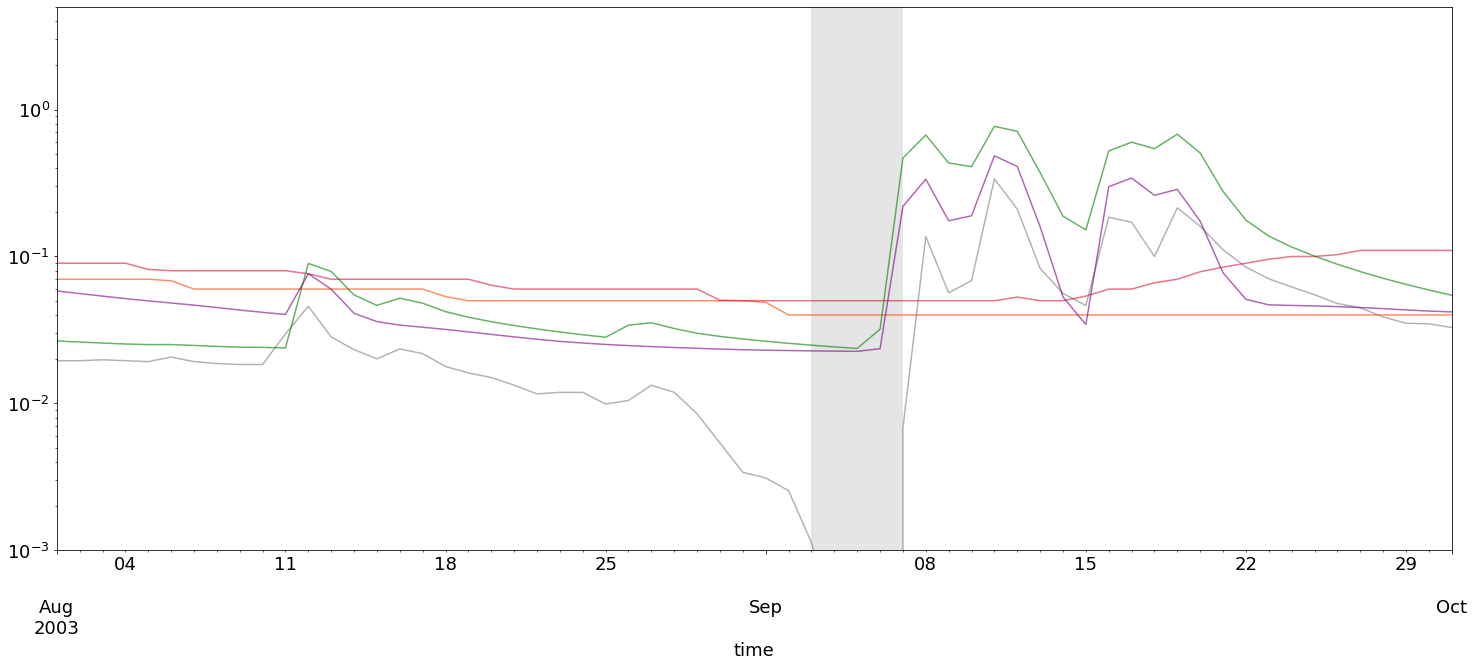

In [34]:

plt.rcParams.update({'font.size': 18})
ax = out.plot(x = "time", 
        y = ["streamflow_NWIS","streamflow_NWM2d1","streamflow_NWM2d0","streamflow_PRMS","streamflow_VIC"],
        alpha=0.6,
        linewidth = 1.5,
        legend = False,
        color = ['grey','orangered','crimson','green','purple'],
        figsize = (25,10),
        logy=True)
ax.set(ylim = (0.001,5))
# ax.axvspan(xmin="2002-06-09", xmax='2002-07-05', facecolor="grey", alpha=0.2)
ax.axvspan(xmin="2003-09-03", xmax='2003-09-07', facecolor="grey", alpha=0.2)
plt.savefig("../docs/AGU23/12115700_dryingregime.pdf")

## 14034470

In [35]:
df = pd.read_csv('../data/pnwNP_modeledData/'+"14034470"+".csv")


df["time"] = pd.to_datetime(df["time"])
tmp = pnwNPdry[pnwNPdry["gage"] == 14034470].reset_index(drop=True)
tmp[(tmp['dryEnd'] <= "2004-03-01")]

,index,gage,event_id,dec_lat_va,dec_long_va,peak_date,peak_value,peak_quantile,peak2zero,drying_rate,...,P_90,PET_90,Tmax_90,melt_90,P.PET,P.PET90,pred_class,dryStart,dryEnd,dryPeakDate
0,25175,14034470,30349,45.34068,-119.5159,196,2.5,0.259411,14,0.387413,...,95,426,20.14778,3.0,0.0,0.223005,3.0,1988-07-28,1988-09-18,1988-07-15
1,25176,14034470,30350,45.34068,-119.5159,187,3.3,0.311430,33,0.567694,...,105,439,21.86111,0.0,0.0,0.239180,3.0,1990-08-08,1990-08-21,1990-07-07
2,25177,14034470,30351,45.34068,-119.5159,167,3.1,0.299110,77,0.261688,...,92,481,24.58222,0.0,0.0,0.191268,3.0,1992-08-31,1992-09-07,1992-06-16
3,25178,14034470,30352,45.34068,-119.5159,185,2.8,0.279489,38,0.316275,...,63,474,22.81778,1.0,0.0,0.132911,3.0,2000-08-10,2000-08-26,2000-07-04
4,25179,14034470,30353,45.34068,-119.5159,178,6.2,0.464446,61,0.438665,...,59,446,23.52889,0.0,0.0,0.132287,3.0,2001-08-27,2001-10-07,2001-06-28
5,25180,14034470,30354,45.34068,-119.5159,172,4.5,0.389003,72,0.325453,...,18,518,26.37111,0.0,0.0,0.034749,3.0,2003-09-01,2003-09-08,2003-06-22


In [36]:
tmp[tmp["event_id"]==30353]

,index,gage,event_id,dec_lat_va,dec_long_va,peak_date,peak_value,peak_quantile,peak2zero,drying_rate,...,P_90,PET_90,Tmax_90,melt_90,P.PET,P.PET90,pred_class,dryStart,dryEnd,dryPeakDate
4,25179,14034470,30353,45.34068,-119.5159,178,6.2,0.464446,61,0.438665,...,59,446,23.52889,0.0,0.0,0.132287,3.0,2001-08-27,2001-10-07,2001-06-28


In [37]:
out = df[(df['time'] >= '2001-06-01')&(df['time'] <= "2001-10-31")]
# out['state'] = 1
# # out.loc[(df['time'] >= "2002-06-09")&(df['time'] < "2002-10-4"),'state'] = 1 ## drying
# out.loc[(df['time'] >= "2002-07-04")&(df['time'] <= "2002-10-04"),'state'] = -999 ## dry

In [38]:
out

,Unnamed: 0,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage
18779,18779,0.363815,2001-06-01,1.074482,0.750000,0.790000,0.133089,14034470
18780,18780,0.532212,2001-06-02,1.431204,0.725000,0.785000,0.167069,14034470
18781,18781,0.521408,2001-06-03,1.615002,0.707917,0.780000,0.203881,14034470
18782,18782,0.404545,2001-06-04,1.582882,0.697500,0.780000,0.178396,14034470
18783,18783,0.344376,2001-06-05,1.546311,0.685000,0.771667,0.116099,14034470
...,...,...,...,...,...,...,...,...
18927,18927,0.015163,2001-10-27,0.609771,0.150000,0.310000,0.022937,14034470
18928,18928,0.036916,2001-10-28,0.694176,0.152083,0.310000,0.024352,14034470
18929,18929,0.108183,2001-10-29,1.021576,0.160000,0.310000,0.039927,14034470
18930,18930,0.177017,2001-10-30,1.402712,0.160000,0.310000,0.114683,14034470


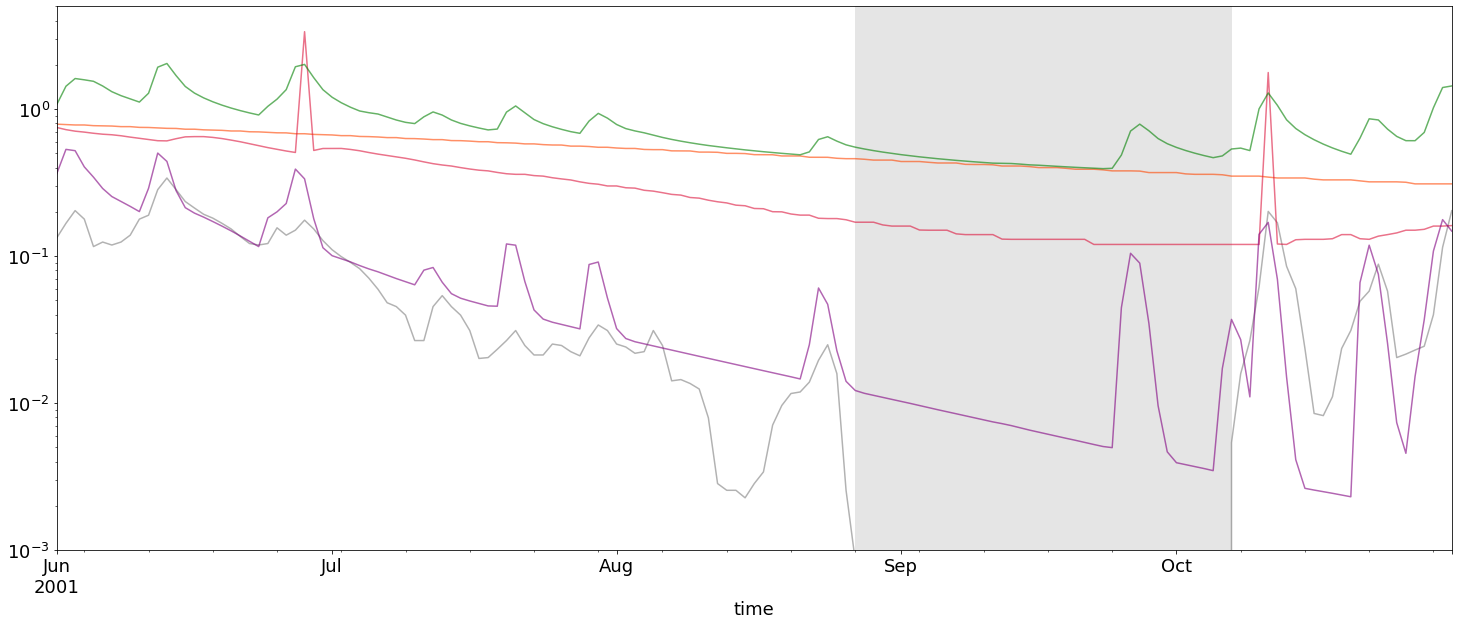

In [39]:
plt.rcParams.update({'font.size': 18})
ax = out.plot(x = "time", 
        y = ["streamflow_NWIS","streamflow_NWM2d1","streamflow_NWM2d0","streamflow_PRMS","streamflow_VIC"],
        alpha=0.6,
        linewidth = 1.5,
        legend = False,
        color = ['grey','orangered','crimson','green','purple'],
        figsize = (25,10),
        logy=True)
ax.set(ylim = (0.001,5))
ax.axvspan(xmin="2001-08-27", xmax='2001-10-07', facecolor="grey", alpha=0.2)
plt.savefig("../docs/AGU23/14034470_dryingregime.pdf")